# Reading and Visualizing Whole Slide Images

Click to open in:  \[[GitHub](https://github.com/DIDSR/wsi_processing_toolbox/blob/main/01_read_wsi.ipynb)\]

Developer: Seyed.kahaki@fda.hhs.gov

## About this demo

This demonstration guides you through the process of utilizing WSIToolbox to interact with a whole slide image (WSI). The objective is to provide you with an understanding of how to load a WSI, extract relevant information, and subsequently retrieve WSI sub image. In the first part of this demo, we focus on loading a sample WSI. This involves utilizing WSIToolbox's built-in functions to successfully read the image file. These functions are designed to handle the complexities of WSI files, which can be vast and multi-layered, ensuring that the image is loaded. 
After successfully loading the WSI, we proceed to extract key information about the image. This involves identifying and WSI characteristics such as the WSI's dimensions, the number of image layers, and the magnification levels. By understanding these attributes, we can more effectively analyze the slide and extract relevant sections for further study. Let’s start with the environment configuration.


## Environment Configuration

Please follow the instruction provided in the Installation section to install related dependencies. If this isn't your first time running this code and you have all these packages installed, you can skip to the next step. If you choose to run it regardless, you might encounter an error message; however, this won't negatively impact your session. On Jupyter Notebook, this cell is responsible for installing required packages for wsi_reader module.

In [1]:
# to check your python version
from platform import python_version
print(python_version())
# !apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools | tail --line 1
# pip install cv2== 4.5.3
# pip install openslide-python==1.1.2
# pip install Shapely==1.7.1
# pip install  tifffile==2022.10.10
# pip install random
# pip install glob
print("Installation is done.")

3.8.8
Installation is done.


## Loading Required Packages
In this step, we will import several Python modules that are needed for our analysis.


In [2]:
import os

from WSI.readwsi import WSIReader
import matplotlib.pyplot as plt

import numpy as np

### Note:
if you had a dll error for reading openslide dll ('libopenslide-0.dll') you can set this line before import openslide:


In [3]:
#import os
#os.environ['path'] ="...\\openslide...\\bin"+";"+os.environ['path']

## Read Whole Slide Image
In this section, we load a WSI and create the WSI object. This is enabled using the wsi_reader method in the ReadWsi package. For this, we will set up a directory which contains our WSI files, we will create a list in Python and append WSI names in this list and load the WSI using the wsi_reader using an index. 

In [4]:
                                # Suitable for windows with fast extarction

# dir_file = r"C:\Users\data"
# WSIs_ = glob(dir_file+'/*.svs')




                                # Suitable for Linux 
    
#dir_file = r"C:\Users\data"   # root dir for load svs files

#wsis=[]

#files = os.listdir(dir_file)
#for i in files :
#    if i.endswith(".svs")==True :
#        wsis.append(i)
#

#WSIs_ = [os.path.join(dir_file,f) for f in wsis]
#print(WSIs_)


#wsi_obj =ReadWsi.wsi_reader(WSIs_[0])



We also can get the directory name and WSI filename from the user in the command prompt:

In [5]:
while True:
    # loading input directory
    dir_file = input(r"Please enter the file directory, for example: C:\DATA\0_Washu-Aperio\: ")
    # Getting the wsi file name
    file_name = input("Please enter the file name, for example: aperio-002-0.svs:")
    
    print("\n")
    path = dir_file + "\\" + file_name
    
    #Checking folder availability 
    if os.path.exists(path):
        #reading wsi file 
        wsi_obj =WSIReader.wsi_reader(path)
        break
    else:
        print("File path error!" )

print("WSI Loaded ...")

Please enter the file directory, for example: C:\DATA\0_Washu-Aperio\: C:\DATA\0_Washu-Aperio\
Please enter the file name, for example: aperio-002-0.svs:HTT-TILS-001-82B.ndpi


WSI Loaded ...


After reading the WSI using the wsi_reader, we have an object which has the loaded WSI. To validate if the object is loaded correctly, we print the object and also print the available pyramid levels of the WSI using the “.level_dimensions” method. 

In [6]:
print(wsi_obj)
print(wsi_obj.level_dimensions)

OpenSlide('C:\\DATA\\0_Washu-Aperio\\\\HTT-TILS-001-82B.ndpi')
((71424, 51200), (35712, 25600), (17856, 12800), (8928, 6400), (4464, 3200), (2232, 1600), (1116, 800), (558, 400), (279, 200))


## Thumbnail Visualization

To see a thumbnail of the WSI, we use the get_thumbnail method of wsi_reader. We load the thumbnail as follows:

Please enter x-size in pixels, for example: 600 ... 600
Please enter y-size in pixels, for example: 300 ...300
Visualizing WSI: HTT-TILS-001-82B.ndpi


Text(0.5, 1.0, 'WSI thumbnail')

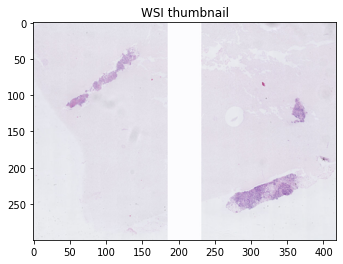

In [7]:
###################################  WSI thumbnail code to show the WSI in small size

#Getting the thumbnail size from the user
size_ = [int (input("Please enter x-size in pixels, for example: 600 ... ")),int (input("Please enter y-size in pixels, for example: 300 ..."))]
#for example: size_ = (600,300)

#Getting the thumbnail 
tile= wsi_obj.get_thumbnail(size=size_)
print("Visualizing WSI: "+file_name)
plt.imshow(tile)
plt.title("WSI thumbnail")

## Extract WSI Region

The next stage of this demonstration involves extracting image regions from the WSI. We achieve this through using WSIToolbox's extract_region method. This is a critical step as it enables us to focus on specific areas of the slide, which can then be subjected to detailed analysis. Lets jump into the code by setting up plotting properties. Here we import matplotlib and set some options for plotting results to make the output looks better.

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 70  # for high resolution figure in notebook
mpl.rcParams["figure.facecolor"] = "white"  # To make sure text is visible in dark mode
plt.rcParams.update({"font.size": 5})

Now we call the reader from the WSI object and plot a small size WSI:

((71424, 51200), (35712, 25600), (17856, 12800), (8928, 6400), (4464, 3200), (2232, 1600), (1116, 800), (558, 400), (279, 200))
Wsi size =  (17856, 12800)  in level  2


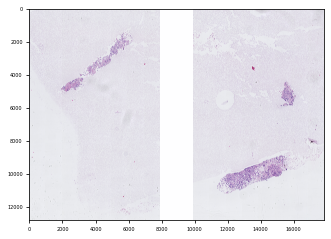

In [9]:
#Call the reader
location = (0,0)                              #location (tuple) – (x, y)
level =2                                      # level(int): set level from 0 to maximum number of pyramid layers in WSI
#size =     wsi_obj.level_dimensions[1]

# Check WSI levels
WSI_Levels = wsi_obj.level_dimensions
print(WSI_Levels)
if (len(WSI_Levels) - 1) < level:
    print("ERROR! Please enter level equal or less than " + str(len(WSI_Levels)))
else:
    size =  wsi_obj.level_dimensions[level]
    file= WSIReader.extract_region(wsi_obj,location,level,size)

    print("Wsi size = ",file.size ," in level ",level)

    plt.imshow(np.asarray(file).astype(np.uint32), cmap='gray')
    plt.show()

## Read Rectangle

Next, we will read a region of the whole slide image at a given location and size using the read_rect method. Running this code will ask the user to set the x and y coordinates (start points), the WSI pyramid level (set level to 0 for the best resolution), and the size of the area (in x and y directions).

Please enter the x-coordinate, for example: 3600)... 3600
Please enter the y-coordinate (example: 28000)...28000
Please enter The WSI level to use, for example: 0 0
Please enter the size of tiles, for example: 255 255
((71424, 51200), (35712, 25600), (17856, 12800), (8928, 6400), (4464, 3200), (2232, 1600), (1116, 800), (558, 400), (279, 200))
Wsi size =  (255, 255)  in level  0


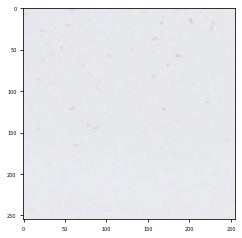

In [10]:
while True:
    
    
    #### read_region(location, level, size)
    
    
    #location (tuple) = tuple giving the top left pixel location
    #level (int) =  The number of levels in the slide. Levels are numbered from 0 (highest resolution) to level_count - 1 (lowest resolution).
    #size (tuple) – (width, height) the region size
    
    #for example
  
    # location = (3600,28000)
    #level =0                  
    #size = (255,255) 
    

    location = [int (input("Please enter the x-coordinate, for example: 3600)... ")),int (input("Please enter the y-coordinate (example: 28000)..."))]
               
    level = int(input(r"Please enter The WSI level to use, for example: 0 "))
    
    size_ =int( input(r"Please enter the size of tiles, for example: 255 "))
    size= [size_,size_]
    
    break
    
    # Check WSI levels
WSI_Levels = wsi_obj.level_dimensions
print(WSI_Levels)
if (len(WSI_Levels) - 1) < level:
    print("ERROR! Please enter level equal or less than " + str(len(WSI_Levels)))
else:
    
    file= WSIReader.extract_region(wsi_obj,location,level,size)

    print("Wsi size = ",file.size ," in level ",level)

    plt.imshow(np.asarray(file).astype(np.uint32), cmap='gray')
    plt.show()

## Read bound
In this section, we will show how to read a region of the whole slide image within given bounds. Bounds is a tuple of (top left, bottom left, top right, bottom right) of the region. First Let’s check the dimensions of the WSI:


Please enter top left coordinate, for example 3600:  3600
Please enter the bottom left coordinate, for example 28000: 28000
Please enter the top right coordinate, for example 4500:4500
Please enter the bottom right coordinate, for example 30000: ...30000
Please enter the WSI level to use: 0 0
((123503, 38380), (30875, 9595), (7718, 2398), (3859, 1199))
Wsi size =  (2000, 900)  in level  0


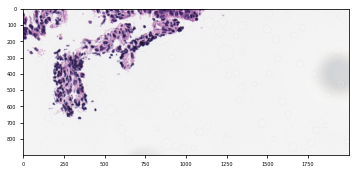

In [24]:
while True:
    
    # Specify the bounds in terms of rectangle (top left, bottom left, top right, bottom right)
    bounds = [int (input("Please enter top left coordinate, for example 3600:  ")),int (input("Please enter the bottom left coordinate, for example 28000: ")),int (input("Please enter the top right coordinate, for example 4500:")),int (input("Please enter the bottom right coordinate, for example 30000: ..."))]
    
    #The number of levels in the slide. Levels are numbered from 0 (highest resolution) to level_count - 1 (lowest resolution).           
    level = int(input(r"Please enter the WSI level to use: 0 "))
     
    break
    
    
WSI_Levels = wsi_obj.level_dimensions
print(WSI_Levels)
if (len(WSI_Levels) - 1) < level:
    print("ERROR! Please enter level equal or less than " + str(len(WSI_Levels)))
else:
    file= WSIReader.extract_bounds(wsi_obj,bounds,level)

    print("Wsi size = ",file.size ," in level ",level)

    file = np.array(file)

    plt.imshow(np.asarray(file).astype(np.uint32), cmap='gray')
    plt.show()

## Read bound by setting manually
You also can set the bounds manually (hard code) and get the region as follows: 


Wsi size =  (2000, 900)  in level  0


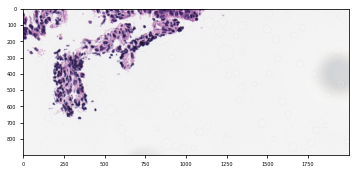

In [25]:
# Setting inputs manually


# Specify the bounds in terms of rectangle (left, top, right, bottom)
bounds = [3600, 28000, 4500, 30000]

#The WSI level to use. Levels are numbered from 0 (highest resolution) to level_count - 1 (lowest resolution).
level = 0


file= WSIReader.extract_bounds(wsi_obj,bounds,level)

print("Wsi size = ",file.size ," in level ",level)

file = np.array(file)

plt.imshow(np.asarray(file).astype(np.uint32), cmap='gray')
plt.show()
